<a href="https://colab.research.google.com/github/mainarel/Numerical_Methods_6/blob/main/3_NL_heat_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import math

n, k, m = 1, -1/3, -1/3
hi = 1
u_0 = 1.25
a0, b0, a1, b1 = 0, 1, 0, 1


def alpha(n):
  return math.sqrt(2*(n+2)/n)

def f(x):
  return n/(2*(n+2)) * ((alpha(n))**2 - x**2)  # x = [0, alpha]

def u(x,t):
    if (x >= 0) and (x < alpha(n) * math.sqrt(hi * u_0**n * t** (k*n+1))):
        return u_0 * t**k * (f(x / math.sqrt((hi * u_0**n * t**(k*n+1))))) **(1/n)
    else:
        return 0


def lmbd(uu):
    return uu**n

def gamma(t):
    return u_0 * t**k


Прогонка:

In [138]:
def thomas_algorithm(a, b, c, f, n):
    A = np.zeros(n)
    B = np.zeros(n)
    y = np.zeros(n)

    A[0] = -c[0] / b[0]
    B[0] = f[0] / b[0]

    for i in range(1, n - 1):
        A[i] = -c[i] / (b[i] + a[i] * A[i - 1])
    A[-1] = 0

    for i in range(1, n):
        B[i] = (f[i] - a[i] * B[i - 1]) / (b[i] + a[i] * A[i - 1])
    y[-1] = B[-1]

    for i in reversed(range(n-1)):
        y[i] = B[i] + A[i] * y[i + 1]
    return y

In [139]:
def p(prev, next, tau, step, xk, h):

    a = np.zeros(len(xk))
    b = np.zeros(len(xk))
    c = np.zeros(len(xk))
    d = np.zeros(len(xk))

    d[0] = gamma(step*tau)
    d[-1] = u(xk[-1],tau*step)

    b[0] = -(a0/h) + b0
    c[0] = a0/h

    b[-1] = (a1 / h) + b1
    a[-1] = -a1/h

    for i in range(1, len(xk)-1):
        a[i] = tau/(2*h**2) * (lmbd(next[i]) + lmbd(next[i - 1]))
        b[i] = - tau/(2*h**2) * (2*lmbd(next[i]) + lmbd(next[i - 1]) + lmbd(next[i + 1])) - 1
        c[i] = tau/(2*h**2) * (lmbd(next[i]) + lmbd(next[i + 1]))
        d[i] = - prev[i]

    return thomas_algorithm(a,b,c,d,len(xk))

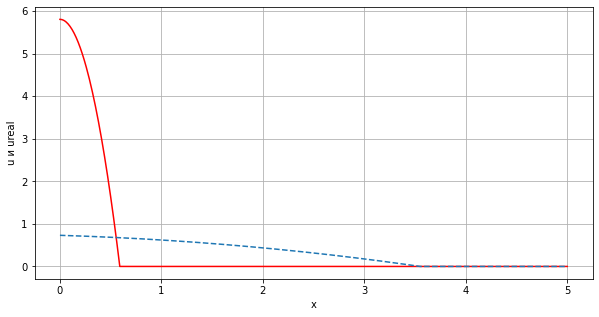

In [140]:
h = 0.01
tau = 0.01

xmin = 0
xmax = 5
xrange = np.arange(xmin, xmax + h, h)

u1 = np.zeros((2, len(xrange)))
err = np.zeros(len(xrange))

u1[0] = [u(xrange[j], 0) for j in range(len(xrange))]


for step in range(1, len(xrange)):
    u1[0] = u1[1].copy()
    u1[1] = p(u1[0], u1[1], tau, step, xrange, h)

y = u1[1]

yreal = np.zeros(len(xrange))
for j in range(len(xrange)):
  yreal = [u(xrange[j], tau) for j in range(len(xrange))]

plt.figure(figsize=(10,5))
plt.xlabel("x")
plt.ylabel("u и ureal")
plt.grid()
plt.plot(xrange, yreal, color='red')
plt.plot(xrange, y, linestyle="--")


Анимация:

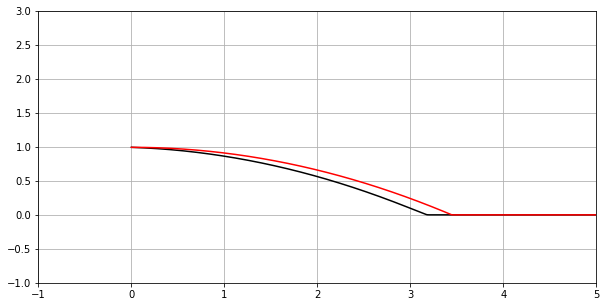

In [141]:
from matplotlib.animation import FuncAnimation, PillowWriter

fig = plt.figure(figsize=(10,5))
u2 = np.zeros((2, len(xrange)))

ax = plt.axes(xlim=(xmin-1, xmax), ylim=(-1, 3))
ax.grid(True)
line1, = ax.plot([], [], label="Numerical solution", color = 'black' )
line2, = ax.plot([], [],  label="Analytical solution", color = 'red')
line1.set_data([], [])
line2.set_data([], [])


def animate(i):
    yreal = np.zeros(len(xrange))
    if (i == 0 or i == 1):
        y = u2[i]
        for j in range(len(xrange)):
            yreal[j] = u(xrange[j], i * tau)
    else:
        u2[0] = np.copy(u2[1])
        for j in range(50):
            u2[1] = next(u2[0], u2[1], tau, i, xrange, h)
        y = u2[1]
        for j in range(len(xrange)):
            yreal[j] = u(xrange[j], i * tau)

    line1.set_data(xrange, y)
    line2.set_data(xrange, yreal)
    return line2, line1

anim1 = FuncAnimation(fig, animate,
                     frames= 200, interval=100, blit=True)
anim1.save('heat.gif',  writer='pillow')

